## Resumo

Nessa etapa, vamos visualizar os dados e identificar padroes para posteriormente aplicar ajustes como balanceamento e  outras correções

In [1]:
# Buscar dados

import os
import pandas as pd

colunas = ['Código NCM', 'Descrição']
df_sintetico = pd.DataFrame(columns=colunas)
df_sintetico = pd.read_excel(r'dados_tratados_ncm_e_descricao.xlsx', dtype={'Código NCM': str})

#visualizando
df_sintetico

,Código NCM,Descrição
0,21069090,rech forn maracujar kg principio
1,21069090,rech forn coco cremoso kg principio
2,08044000,abac
3,08044000,abac avocado kg
4,08043000,abacaxi pc
...,...,...
499590,96190000,roupa intima plenitud femm g
499591,96190000,fralda desc geriat plenitud protect plu gxg un
499592,96190000,fralda desc turma monica babi xxg un
499593,96190000,fralda descartavel pom pom xg un


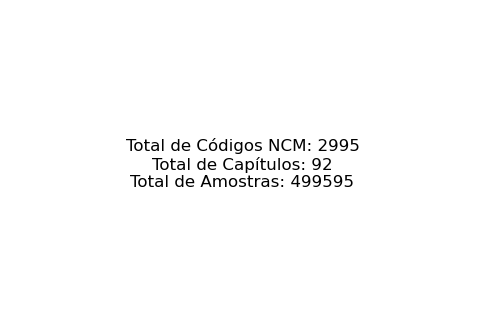

Total de Códigos NCM: 2995
Total de Capítulos: 92
Total de Amostras: 499595


In [2]:
import matplotlib.pyplot as plt

# Calcular o total de códigos NCM por grupo
df_groups = df_sintetico['Código NCM'].astype(str).apply(lambda x: x[:2]).groupby(df_sintetico['Código NCM']).count()
total_ncm = df_groups.shape[0]  # Total de códigos NCM

# Calcular o total de capítulos
total_capitulos = df_sintetico['Código NCM'].astype(str).apply(lambda x: x[:2]).nunique()  # Total de capítulos

# Calcular o total geral de amostras
total_amostras = df_sintetico.shape[0]  # Total geral de amostras

# Exibir os resultados em um "card"
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, f"Total de Códigos NCM: {total_ncm}\nTotal de Capítulos: {total_capitulos}\nTotal de Amostras: {total_amostras}",
         fontsize=12, ha='center', va='center')
plt.axis('off')  # Remover os eixos do gráfico
plt.show()

# Exibir os valores com print
print(f"Total de Códigos NCM: {total_ncm}")
print(f"Total de Capítulos: {total_capitulos}")
print(f"Total de Amostras: {total_amostras}")


In [3]:
import pandas as pd

# Verificar o número máximo de amostras permitidas para o capítulo
quantidade_maxima = 500

# Contar o número de amostras para cada capítulo
#contagem_capitulo = df_sintetico['Código NCM'].value_counts()
contagem_capitulo = df_sintetico['Código NCM'].astype(str).groupby(df_sintetico['Código NCM']).count()

# Identificar os capítulos que possuem mais de 5000 amostras
#capitulos_acima_limite = contagem_capitulo[contagem_capitulo > limite_amostras].index
capitulos_loop = contagem_capitulo.index

# Criar um novo DataFrame para armazenar os dados filtrados
df_filtrado = pd.DataFrame()

# Iterar pelos capítulos que ultrapassam o limite de amostras
for capitulo in capitulos_loop:
    # Selecionar as amostras do capítulo atual
    df_capitulo = df_sintetico[df_sintetico['Código NCM'] == capitulo]
    
    # Verificar se o número de amostras é maior que o limite
    if len(df_capitulo) > quantidade_maxima:
        # Remover aleatoriamente as amostras extras
        df_capitulo_filtrado = df_capitulo.sample(n=quantidade_maxima, random_state=42)
    else:
        # Manter todas as amostras do capítulo
        df_capitulo_filtrado = df_capitulo
    
    # Adicionar as amostras filtradas ao DataFrame final
    
    df_filtrado = pd.concat([df_filtrado, df_capitulo_filtrado])

# Atualizar o DataFrame original com os dados filtrados

df_sintetico = df_filtrado

In [4]:
import pandas as pd

# Definir a quantidade mínima de amostras por classe
quantidade_minima = 100

# Contar o número de amostras para cada classe
contagem_ncm = df_sintetico['Código NCM'].value_counts()

# Identificar as classes que possuem menos de 100 amostras
classes_remover = contagem_ncm[contagem_ncm < quantidade_minima].index

# Filtrar as amostras removendo as classes com quantidade insuficiente
df_sintetico = df_sintetico[~df_sintetico['Código NCM'].isin(classes_remover)]


In [5]:
#normalização teste aumentando as instancia para 100

import pandas as pd
from sklearn.utils import resample

# Verificar o número máximo de amostras desejado (100)
quantidade_desejada = 200

# Contar o número de amostras para cada capítulo
contagem_capitulo = df_sintetico['Código NCM'].astype(str).groupby(df_sintetico['Código NCM']).count()

# Criar um novo DataFrame para armazenar os dados balanceados
df_balanceado = pd.DataFrame()

# Iterar pelos capítulos
for capitulo, quantidade in contagem_capitulo.items():
    df_capitulo = df_sintetico[df_sintetico['Código NCM'] == capitulo]
    
    # Verificar se a quantidade de amostras é menor que o desejado (100)
    if quantidade < quantidade_desejada:
        # Calcular a quantidade de amostras a serem replicadas
        quantidade_replicar = quantidade_desejada - quantidade
        
        # Aplicar o oversampling replicando as amostras existentes
        df_capitulo_oversampled = resample(df_capitulo, replace=True, n_samples=quantidade_replicar, random_state=42)
        
        # Adicionar as amostras oversampled ao DataFrame balanceado
        df_balanceado = pd.concat([df_balanceado, df_capitulo, df_capitulo_oversampled])
    else:
        # Manter todas as amostras do capítulo
        df_balanceado = pd.concat([df_balanceado, df_capitulo])

# Atualizar o DataFrame original com os dados balanceados
df_sintetico = df_balanceado


In [6]:
import matplotlib.pyplot as plt

#calculate sum of values by group
df_groups = df_sintetico['Código NCM'].astype(str).groupby(df_sintetico['Código NCM']).count()
df_groups_sorted = df_groups.sort_values()
df_groups_sorted
#create bar plot by group
#df_groups.plot(kind='bar',figsize=(20,3))

Código NCM
62046300    200
95030070    200
34070010    200
18062000    200
66019110    200
           ... 
33062000    500
33069000    500
33072010    500
23099010    500
96190000    500
Name: Código NCM, Length: 504, dtype: int64

In [7]:
df_sintetico.dropna(subset=['Descrição'], inplace=True)

In [8]:
df_sintetico.to_excel('normalizados_dados_tratados_ncm_e_descricao.xlsx', index=False, header=True)

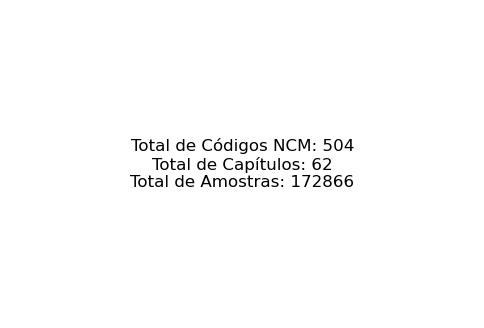

Total de Códigos NCM: 504
Total de Capítulos: 62
Total de Amostras: 172866


In [9]:
import matplotlib.pyplot as plt

# Calcular o total de códigos NCM por grupo
df_groups = df_sintetico['Código NCM'].astype(str).apply(lambda x: x[:2]).groupby(df_sintetico['Código NCM']).count()
total_ncm = df_groups.shape[0]  # Total de códigos NCM

# Calcular o total de capítulos
total_capitulos = df_sintetico['Código NCM'].astype(str).apply(lambda x: x[:2]).nunique()  # Total de capítulos

# Calcular o total geral de amostras
total_amostras = df_sintetico.shape[0]  # Total geral de amostras

# Exibir os resultados em um "card"
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, f"Total de Códigos NCM: {total_ncm}\nTotal de Capítulos: {total_capitulos}\nTotal de Amostras: {total_amostras}",
         fontsize=12, ha='center', va='center')
plt.axis('off')  # Remover os eixos do gráfico
plt.show()

# Exibir os valores com print
print(f"Total de Códigos NCM: {total_ncm}")
print(f"Total de Capítulos: {total_capitulos}")
print(f"Total de Amostras: {total_amostras}")
